This analysis is to build a model to predict the churn probability of customers based on the given customer features or any derived features.    
We then can extend the analysis and model scenarios where in  the profitability can be increased.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.formula.api as smf

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from scipy.optimize  import minimize

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import metrics

In [7]:
churn_data = pd.read_csv("telco_churn_data.csv")

In [8]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   Contract          7032 non-null   object 
 6   PaperlessBilling  7032 non-null   object 
 7   MonthlyCharges    7032 non-null   float64
 8   Churn             7032 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 494.6+ KB


In [9]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Female,0,Yes,No,No,Month-to-month,Yes,29.85,No
1,Male,0,No,No,Yes,One year,No,56.95,No
2,Male,0,No,No,Yes,Month-to-month,Yes,53.85,Yes
3,Male,0,No,No,No,One year,No,42.30,No
4,Female,0,No,No,Yes,Month-to-month,Yes,70.70,Yes


In [10]:
churn_data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [11]:
churn_data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
churn_data['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [13]:
churn_data['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [14]:
churn_data['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [15]:
churn_data['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [16]:
churn_data['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [17]:
## convert yes/no to 1/0.
def change_val(val):
    if val == 'Yes':
        return 1
    else:
        return 0
churn_data['Churn'] = churn_data['Churn'].apply(lambda x: change_val(x))

In [18]:
## select the first 5000 customers
data = churn_data.copy()
data = data[:5000]

In [19]:
## logistic regression
m1 = smf.logit(
  formula='Churn ~ gender + SeniorCitizen + Partner + Dependents  + Contract + PaperlessBilling + MonthlyCharges',
  data= data) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.450077
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Dec 2020   Pseudo R-squ.:                  0.2194
Time:                        22:20:48   Log-Likelihood:                -2250.4
converged:                       True   LL-Null:                       -2882.9
Covariance Type:            nonrobust   LLR p-value:                8.375e-268
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.5948      0.117    -13.684      0.000      -1.823      -1.366
gender[T.Male]             -0.0376      0.073     -0.515      0.607      -0.181       0.105
Partner[T.Yes]             -0.2817      0.085     -3.302      0.001      -0.449      -0.115
Dependents[T.Yes]          -0.2074      0.102     -2.038      0.042      -0.407      -0.008
Contract[T.One year]       -1.7092      0.111    -15.426      0.000      -1.926      -1.492
Contract[T.Two year]       -3.2776      0.199    -16.480      0.000      -3.667      -2.888
PaperlessBilling[T.Yes]     0.4115      0.083      4.937      0.000       0.248       0.575
SeniorCitizen               0.2417      0.093      2.591      0.010       0.059       0.424
MonthlyCharges              0.0164      0.001     10.926      0.000       0.013       0.019
===========================================================================================
"""

The log odds of probability of churn decreases with 
Male gender, with Partner as Yes, with Dependent as Yes , change of billing plan from month-to-month to one year , two year.  
The log odds of probability of churn increases with increase in monthly charges or being a senior citizen.

In [20]:
## predict the probability of churn 
churn_prob = m1.predict()
pred_class = [1 if i > 0.5 else 0 for i in churn_prob]

In [21]:
## 
confusion_matrix(data['Churn'],pred_class )

array([[3270,  413],
       [ 778,  539]])

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(data['Churn'], churn_prob)
pr, recall, thresholds = metrics.precision_recall_curve(data['Churn'], churn_prob)

In [23]:
roc_auc =  metrics.auc(fpr, tpr)
f1_score = metrics.f1_score(data['Churn'],pred_class)


Text(0.5, 0, 'Recall')

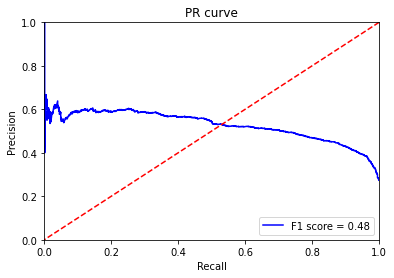

In [34]:
plt.title('PR curve')
plt.plot(recall, pr, 'b', label = 'F1 score = %0.2f' % f1_score)
plt.legend(loc = 'lower right')
plt.plot([1, 0], [1, 0],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')

Precision of the model is poor.

Text(0.5, 0, 'False Positive Rate')

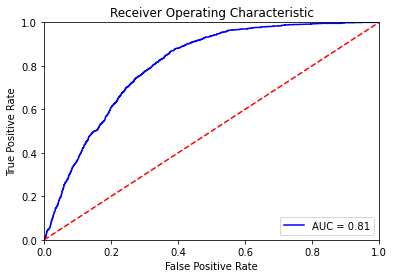

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [22]:
results_df = data.copy()
results_df['prob'] = churn_prob
##


(array([1573.,  394.,  440.,  334.,  393.,  460.,  461.,  551.,  316.,
          78.]),
 array([0.00612897, 0.07686536, 0.14760174, 0.21833813, 0.28907452,
        0.3598109 , 0.43054729, 0.50128368, 0.57202006, 0.64275645,
        0.71349284]),
 <a list of 10 Patch objects>)

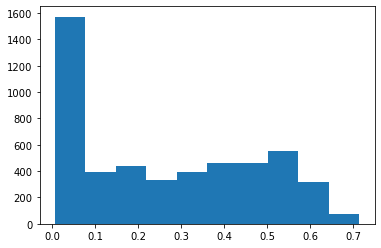

In [23]:
## How many customers have churn probablity of less than 0.2 
plt.hist(results_df['prob'])

In [54]:
results_df[results_df['prob'] < 0.2].shape

(2219, 10)

2219 customers have a low churn probability.  

In [55]:
m1.params

Intercept                 -1.594757
gender[T.Male]            -0.037550
Partner[T.Yes]            -0.281698
Dependents[T.Yes]         -0.207355
Contract[T.One year]      -1.709170
Contract[T.Two year]      -3.277585
PaperlessBilling[T.Yes]    0.411512
SeniorCitizen              0.241657
MonthlyCharges             0.016378
dtype: float64

In [58]:
## By how much can the monthly charge increase for change of plan from 'month to month' to 'one year' 
## so that there is a reduction in churn probability 

-m1.params[4]/m1.params[8]

104.35727472576598

The monthy charge can increase by 104 with a change in plan from 'month to month' to 'one year' and have a reduction in log odds of probability of churn.  

In [24]:
## function to calculate customer lifetime value.
## for an increement in monthly charges, estimate the probability of churn and hence the retention rate.

def get_clv(incr, data):
    d = 0.97 # discount factor
    df = data.copy()
    df = df[df['Churn']==0]
    df['MonthlyCharges'] = df['MonthlyCharges']*incr
    r = (1- m1.predict(df))
    clv = df['MonthlyCharges']/(1-r*d)
    
    return (sum(clv))                           

In [25]:
get_clv(1,data)

1911803.7655382946

In [26]:
get_clv(1.5, data)

2111084.2168128304

In [27]:
## function that can be optimised to find out the optimal increment in monthly charge , which maximised the customer life
## time value.
def get_clv_2(incr):
    d = 0.97 # discount factor
    df = data.copy()
    df = df[df['Churn']==0]
    df['MonthlyCharges'] = df['MonthlyCharges']*incr
    r = (1- m1.predict(df))
    clv = df['MonthlyCharges']/(1-r*d)
    
    return -(sum(clv)) 

In [28]:
## increment between 1 and 2 .
bounds = [(1,2)]

In [29]:
soln = minimize(get_clv_2 , 4,  bounds = bounds ,  method = 'SLSQP' , options = {'disp' : True} )

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2120912.511311958
            Iterations: 7
            Function evaluations: 15
            Gradient evaluations: 7


In [31]:
## Optimal Increment 
soln.x

array([1.67873148])

In [32]:
## Maximised CLV.
-soln.fun

2120912.511311958

Optimal hike in monthly charge is 67% and the maximised total customer life time value is as shown.

In [33]:
## by how much would the CLV  increase if the there is a monthly charge increase of 20% in the following month - 2. 
get_clv(1.2,data) - get_clv(1,data)

119172.82448040019